<a href="https://colab.research.google.com/github/lpceronm/QKD/blob/master/Quantum_Key_Distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Quantum Key Distribution



Cryptography aims to communicate data between authorized entities in a secure way, in fact the encryption era started a century ago with the *One-Time pad* proposed by Vernam which uses a symmetric one-use key shared between a sender and a receiver and that is able to secure the data as long as the key remains secret.  This is where quantum properties provide a perfectly secret transmission key relying upon the immutable laws of physics and instead of  the computational complexity the way it’s implemented  today.

In a QKD system, first studied by Stephen Weisner (1970s), an eavesdropper could be easily detected thanks to the observation errors its measurements introduce to the quantum channel. Nowadays commercial QKD networks are aimed mainly for governments and corporations with high security requirements, however they are currently limited  to short links specially because of problems in the physical layer.

The basic scheme of a quantum key distribution consists of two* authorized partners* sharing information over a classical channel and establishing the secret key with a quantum connection (usually optical fiber).  The partners are traditionally called **Alice** and **Bob**, in case of a third part trying to intercept the communication it is named **Eve** for eavesdropper.

![](https://i.postimg.cc/rmKK355x/QKD.jpg)

The QKD by deffinition tracks Eve, any attempt to measure modifies the state of the measured system. If the eavesdropper interferes the quantum channel it has to recreate the states in order to send them to Bob since the qubit is destroyed when measured. Protocols define a tolerance threshold for the error rate. Error rate is susceptible to eavesdropping, the effect of Eve is now detectable and communication could be restarted if needed. Alternatively if Eve wants to copy the key duplicating the states for further processing this is proven impossible by the non-clonning theorem (Wootters and Zurek, 1982) which makes the quantum channel robust.

There are three main families of explicit QKD protocols: discrete-variable coding, continuous-variable coding, and more recently distributed phase-reference coding, the most significant difference is the scheme detection. In this project we will focus in the well-known discrete-variable protocol BB84 and some of its variations.   







## Discrete Variable Protocols

### BB84 protocol

BB84 is one of the best known QKD discrete-variable protocol developed by Charles Bennet and Gilles Brassard in 1984. In order to construct a common key with Bob, Alice encripts bits of information by imposing a certain polarization on a photon and sending it to Bob via the quantum channel. In order to do this she may choose one out of two basis each with two orthogonal states. The basis used for this protocol are the standard basis, composed of the eigenstates of the *Z* Pauli matrix: $|0\rangle$ and $|1\rangle$, and the Hadammard basis,  composed of the eigenstates of the *X* Pauli matrix: $|+\rangle$ and $|-\rangle$. The principle of this protocol can be summarized in the following steps:



1.   First, Alice will generate a random sequence of bits to be encoded and sent to Bob.
2.   Next, for each of the bits Alice will choose one of the basis at random, polarize a photon in one of the two states and then send that photon to Bob. For example if Alice's bit is '0'  and she chose the standard basis, she will send a photon with the $|0\rangle$ state, if the bit is '1', she will polarize it with the $|1\rangle$ state.
3. Bob will then receive the polarized photon or qubit and will choose at random (and independently for each qubit) one of the two basis to measure it. If it measures the bit with the same basis Alice has encoded it, he will correctly deduce whether Alice sent a '0'  or a '1'. However, if it chooses the wrong basis the resulting bit has a 50% chance of coinciding with the one Alice sent. The series of bits Bob has decoded is now called the *raw key*.

[![Selection-049.jpg](https://i.postimg.cc/xCrHMbn3/Selection-049.jpg)](https://postimg.cc/4K5mTyKY)

4. Bob's raw key and the information Alice sent are only partially correlated. In order to obtain a fully correlated set of bits, Bob will now reveal to Alice (via the classical channel) the basis he used  to decode each of the qubits.
5. Alice will compare Bob's basis with the ones she used to encode the bits and she will announce which ones he chose correctly. Both Alice and Bob will only keep the bits for which the basis used for encoding and decoding were the same. This now reduced bit sequence is called the *sifted key*. Since Bob chooses the basis at random, he will choose incorrectly about 50% of the time. An error rate significantly higher than that would indicate that an eavesdropper is present and the channel is not secure .
6. Alice and Bob share a random portion of their secret keys, compare it bit by bit and determine an estimated error rate. The bits used for the estimatiion will then be discarded.
7. Finally, Bob will correct the errors with a classical post processing method and Alice and him will share a secure key that can subsequently be used to encrypt messages through the classical channel.

There are some variations of the BB84 protocol, most notably the B92 and SSP or Six-State Protocol. 

###B92 protocol

The B92 protocol was proposed by Bennet in 1992 and uses only two non-orthogonal states to encode the information: $|0\rangle$ and  $|+\rangle$. The principle of this protocol can be summarized in the following steps:



1.   Alice generates a random sequence of bits and encodes them in one of the two states such that $|0\rangle$ $|+\rangle$ correspond to bit values of '0' and '1' respectively.
2.   Bob then chooses a random basis (between the standard and the Hadammard basis) to decode each received qubit. However in this protocol he does not tell Alice which basis he used.
3.  Since an outcome of $|0\rangle$ or $|+\rangle$ can result from both the initial states, only outcomes $|1\rangle$ and$|-\rangle$ which correspond to Alice's bits '1' and '0' would lead to a conclusive result, therefore Bob wil tell Alice when he has measured either of those states and only the corresponding bits will be kept.
4. Finally, in an analog fashion to the BB84 protocol, Bob will share with Alice a small random portion of his measurements and she will compare them to what she sent in order to calculate an estimated error rate. Alice must take into account the correspondance of the states, if she sent  $|0\rangle_A$, Bob will have received $|-\rangle_B$ and consequently an initial $|+\rangle_A$ will result in Bob's $|1\rangle_B$ . The calculated error rate indicates how secure is the channel, eventual errors will be corrected and Alice and Bob will then have a secure key. 

###Six-state protocol

The six -state protocol or SSP follows the same primciples as the BB84 protocol but using an additional basis, the eigenstates of the *Y* Pauli matrix $|L\rangle$ and $|R\rangle$. Alice and Bob wil now have to randomly choose between three basis, reducing the number of bits for which they will choose the same basis to about a third. This protocol has the advantage of providing higher symmetry and letting the presence of an Eve be more noticeable.

[![cpb152547f1-hr.jpg](https://i.postimg.cc/x8pNscM8/cpb152547f1-hr.jpg)](https://postimg.cc/SY8KRQZb)

## Categories of possible attacks on QKD algorithms

 One of the main reasons why the QKD algorithms are appealing in today’s cryptographic scene is due to the fact that they can ensure, in principle, unconditional security. An algorithm is said to be unconditional secured if can prove security by resisting any cryptanalytic attack, without imposing computing power or resources limitations to its attacker. In quantum cryptography security is defined in terms of the classical information gained by an attacker when measuring a quantum system.  

As any other cryptographic algorithm, the QKD’s are not exempt from attacks. These attacks put to the test the security level of these algorithms and although they’ve been proven to be secured, the amount of information the attacker gains vary from attack to attack and therefore the security of the algorithms varies as well. The main categories into which these attacks can be divided are the following:

*	Individual attacks
*	Collective attacks
*	Coherent attacks

### Individual attacks

Also known as the most restricted and most realistic kind of attacks. In this attack works Eve (eavesdropper) attacks the qubit sent by Alice by attaching an independent quantum probe to each one, then she measures each probe independently (same way bob does) before the classical post-processing procedure. Finally using the measured information, she tries to get as much information as she cans from the secret key.  

The security of these algorithms has been proven several times because each time eve measures a qubit induces an error  big enough to be detected by Alice and bob.

### Collective attacks

In this kind of attacks, Eve follows a similar procedure as the one in the individual attacks. First, she attaches to each quantum state an identical probe (also referred as quantum system). She now stores this system into a quantum memory (where nonorthogonal quantum states can be kept for a long time) and waits until the end of the classical post-processing where she can collect, from the classical channel, information about the error-correction. With this additional information, she proceeds to measure all the probes at the same time with the aim of maximizing the information she can get from the final key. 

### Coherent or joint attacks

The most powerful and general of the attacks on QKD algorithms. These attacks have the particularity of targeting the final key.  They work very similarly to the collective attacks but instead of processing each quantum state independently, Eve process the quantum key as a whole and attaches to it a single probe (quantum system), then she stores the it and delay the measure until she has the error-correlation information. 

However, prove the security of the QKD’s algorithms against this kind of attacks is extremally difficult due to the fact that performing these attacks under real life circumstances is beyond the domain of modern quantum technology. Security against them has only been proven in a noise-free channel scenario. 

```
```



##Six-state protocol simulation

In [0]:
import numpy as np
import math as mt
import matplotlib.pyplot as plt
import matplotlib as mpl

In [0]:
# Basis
zero = np.array([1,0])## 0
one = np.array([0,1])## 1
plus = np.array([1,1])/np.sqrt(2)## 0
minus = np.array([1,-1])/np.sqrt(2)## 1
l = (1/np.sqrt(2))*(zero + 1j*one)## 0
r = (1/np.sqrt(2))*(zero - 1j*one)## 1

# Pauli matrices
X = np.array([[0 ,1],[1, 0]])
Y = np.array([[0 ,1j],[-1j, 0]])
Z = np.array([[1 ,0],[0, -1]])

In [0]:
class Alice(object):

  usedBasis = []
  bits = []
  qbits = []
  siftedKey = []

  basis = {
    # Base 0/1
    0: {'0': zero, '1': one },
    # Base +/-
    1: {'0': plus, '1': minus},
    # Base L/R
    2:{ '0':l, '1':r  }     
  }
  
  def genQbits(self, lengthChain):
    self.bits = []
    self.qbits = []
    self.usedBasis = []
    self.bits = [np.random.randint(0, 2) for i in range(lengthChain)]
    for i in self.bits:
      base = np.random.choice(list(self.basis.keys()))
      self.usedBasis.append(base)
      self.qbits.append(self.basis[base][str(i)])  
    return self.qbits
  
  def compareBasis(self, sentBasis):
    self.siftedKey = []
    compared = np.array(self.usedBasis) == np.array(sentBasis)
    for i in range(len(compared)):
      if compared[i] == True: 
        self.siftedKey.append(self.bits[i])
    return compared
  
  def errorCheck(self):
    toCheck = []
    index = []
    numInd = mt.ceil(len(self.siftedKey)* 0.15)
#     print(numInd)
    index = np.random.choice(np.array(self.siftedKey).shape[0], 
                             numInd, replace=False) 
    for i in index:
      toCheck.append(self.siftedKey[i])
      self.siftedKey[i] = None  
    self.siftedKey = [x for x in self.siftedKey if x is not None]
    return index,toCheck
  
  def shuffleSiftedKey(self):
    perm = np.random.get_state()
    np.random.shuffle(self.siftedKey)
    return perm

In [0]:
class Bob(object):
  usedBasis = []
  bits = []
  siftedKey = []
  errorRate = 0.0
  
  def __init__(self):
    self.pomZero = self.pomGen(zero)
    self.pomOne = self.pomGen(one)
    self.pomPlus = self.pomGen(plus)
    self.pomMinus = self.pomGen(minus)
    self.pomL = self.pomGen(l)
    self.pomR = self.pomGen(r)
    
  
  def pomGen(self, state):
    return (1/3)* np.outer(state, state.conj())
  
  def pomProbability(self, state,pom):
    prob = np.matrix.trace(pom@state) 
    return prob

  def measure(self, state):
    n = np.random.randint(0,3) #0--> 0>,1> /1--> +>,->/ 2--> L>,R>
    if n == 0:
      p1 = self.pomProbability(state,self.pomZero);
      p2 = self.pomProbability(state,self.pomOne);
      if p1 > p2:
        return 0,n
      else:
        return 1,n
    elif n == 1:
      p1 = self.pomProbability(state,self.pomPlus);
      p2 = self.pomProbability(state,self.pomMinus);
      if p1 > p2:
        return 0,n
      else:
        return 1,n
    elif n == 2:
      p1 = self.pomProbability(state,self.pomL);
      p2 = self.pomProbability(state,self.pomR);
      if p1 > p2:
        return 0,n
      else:
        return 1,n
    
  def measureQbits(self, stateList):
    self.bits = []
    self.usedBasis = []
    for i in range(len(stateList)):
      b,n = self.measure(stateList[i])
      self.bits.append(b)
      self.usedBasis.append(n)
      
  def siftedKey(self, compared):
    self.siftedKey = []
    for i in range(len(compared)):
      if compared[i] == True: 
        self.siftedKey.append(self.bits[i])
        
#   Returns True if the error rate is greater than 5% 
# meaning that an evesdroper was detected.      
  def errorCheck(self, index, bits):
    rate = 0
    ind = 0
    for i in index:
      if self.siftedKey[i] != bits[ind]: 
        rate+= 1 
      ind+=1  
      self.siftedKey[i] = None 
    self.errorRate = rate/len(bits)  
    self.siftedKey = [x for x in self.siftedKey if x is not None]    
    return rate 
  
  def shuffleSiftedKey(self, state):
    np.random.set_state(state)
    np.random.shuffle(self.siftedKey)
    
    

In [0]:
def density(x):
  """ returns the density matrix of all the elements in x  """

  
  p = [] #list to be returned
  for q  in x:
    # |q><q|
    p.append(np.outer(q, q.conj())) #density matrix for each qubit 
    
  return p
  
def transmission(p,r):
    """ returns nosy density matrices given the factor q of noise level """
    t = [] #list to be returned
    for rho in p:
       q = r * np.random.random_sample()
       t.append((1-q)*rho + (q/3)*(X@rho@X + Y@rho@Y + Z@rho@Z))
    return t

In [0]:
class Checker(object):
  aliceKey = []
  bobKey = []
  bkAlice = []
  bkBob = []
  
  def __init__(self, keyA, keyB):
    self.aliceKey = keyA
    self.bobKey = keyB
    self.bkAlice = keyA[0:len(keyA)]
    self.bkBob = keyB[0:len(keyB)]
  
  def parityA(self, min, max):
    #if(len(self.bkAlice[min:max])>1):
    if(max > 0 and max < len(self.bkBob)):
      self.bkAlice[max-1]=-1
    parity = 0
    for a in self.aliceKey[min:max]:
      parity = (parity + a)%2
    return parity
  
  def checkParity(self, min, max):
    print("*********************")
    print("min"+str(min))
    print("max"+str(max))
    size = len(self.bobKey[min:max])
    x = self.parityA(min,max)
    print(str(size))
    if(max > 0 and max < len(self.bkBob)):
      self.bkBob[max-1]=-1
    parity = 0
    print(self.bobKey[min:max])
    print(self.bkBob[min:max])
    
    if(size == 1):
      print("Alice:"+str(x))
      print("Bob  :"+str(self.bobKey[min:max]))
      if (x != self.bobKey[min]):
        print("parity !=")
        self.bobKey[min] = (self.bobKey[min]+1)%2
        self.bkBob[min] = self.bobKey[min]
        return 1
      else:
        print("parity ==")
        return 0
    else:
      #parity calc
      parity = 0
      for a in self.bobKey[min:max]:
          parity = (parity + a)%2

      if(parity == x ):
        print("parity ==")
        return 0
      else:
        if(self.checkParity(min, min+int(size/2)) == 1 ):
          print("check de "+str(min)+","+str(min+int(size/2)))
          return 1
        else:
          if(self.checkParity(min+int(size/2),max) == 1 ):
            print("check de "+str(min+int(size/2))+","+str(max))
            return 1
          else:
            return 0  
    return -1
  
  def cascade(self):
    self.checkParity(0,len(self.aliceKey))
    print(self.bkAlice)
    print(self.bkBob)
    self.aliceKey = [x for x in self.bkAlice if x is not -1] 
    self.bobKey = [x for x in self.bkBob if x is not -1] 
  

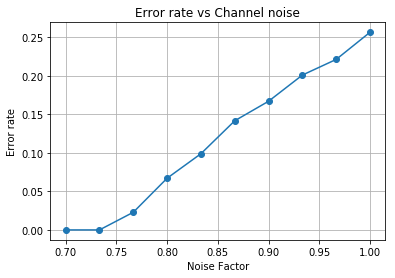

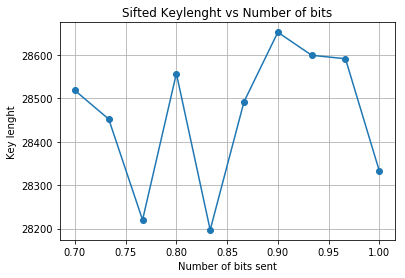

In [0]:
Noise = np.linspace(0.7,1,10)
errorRates = []
keysLenght = []
for q in Noise:
  a = Alice()
  b = Bob()

  qbits = a.genQbits(int(1e5))
  p = density(qbits)
  t = transmission(p,q)
  b.measureQbits(t)
  compared = a.compareBasis(b.usedBasis)
  b.siftedKey(compared)
  index1,bits = a.errorCheck()
  res= b.errorCheck(index1,bits)
  errorRates.append(b.errorRate)
  keysLenght.append(len(b.siftedKey))

plt.plot(Noise,errorRates,'o-')
plt.xlabel('Noise Factor')
plt.ylabel('Error rate')
plt.title('Error rate vs Channel noise')
plt.grid(True)
plt.show()
plt.plot(Noise,keysLenght,'o-')
plt.xlabel('Noise Factor')
plt.ylabel('Key lenght')
plt.title('Sifted Keylenght vs Number of bits')
plt.grid(True)
plt.show()

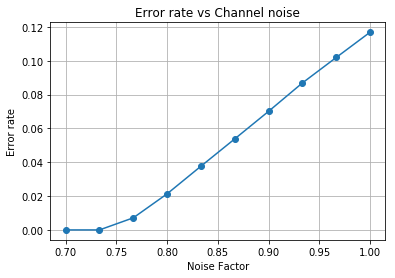

In [0]:
Noise = np.linspace(0.7,1,10)
bitsSize = np.linspace(10000,50000,10)
errorRates = []
keysLenght = []
errorMean = []
for q in Noise:
  for s in bitsSize:
    a = Alice()
    b = Bob()
    
    qbits = a.genQbits(int(s))
    p = density(qbits)
    t = transmission(p,q)
    b.measureQbits(t)
    compared = a.compareBasis(b.usedBasis)
    b.siftedKey(compared)
    index1,bits = a.errorCheck()
    res= b.errorCheck(index1,bits)
    errorRates.append(b.errorRate)
    keysLenght.append(len(b.siftedKey))
  errorMean.append(np.mean(np.array(errorRates)))
  
plt.plot(Noise,errorMean,'o-')
plt.xlabel('Noise Factor')
plt.ylabel('Error rate')
plt.title('Error rate vs Channel noise')
plt.grid(True)
plt.show()
  
#plt.plot(bitsSize,errorRates,'o-')
#plt.xlabel('Number of bits sent')
#plt.ylabel('Error rate')
#plt.title('Error rate vs Number of bits')
#plt.grid(True)
#plt.show()

#plt.plot(bitsSize,keysLenght,'o-')
#plt.xlabel('Number of bits sent')
#plt.ylabel('Key lenght')
#plt.title('Sifted Keylenght vs Number of bits')
#plt.grid(True)
#plt.show()

array([ 100000.     ,  100009.00009,  100018.00018, ...,  999981.99982,
        999990.99991, 1000000.     ])

In [0]:
# array1 = [1,1,1,0,1,1,1,0,1,1,1,0,1,1,0,0,1,1,1,0,0,1,1,0,1]
# array2 = [1,1,1,1,1,1,1,0,1,1,1,0,1,1,1,0,1,1,1,0,1,1,1,0,1]

# c = Checker(array1,array2)
# c.cascade()

# print("AliceKey " +str(c.aliceKey))
# print("BobKey   " +str(c.bobKey))



In [0]:
a = Alice()
b = Bob()

qbits = a.genQbits(int(300))
# print("Alice bits")
# print(a.bits)
# print( )
# print("Alice Qbits")
# print(qbits)
# print( )

# print("Alice Usedbasis")
# print(a.usedBasis)
# print( )
p = density(qbits)
# print("Density")
# # print(p)
# print( )
t = transmission(p,.78)
# print("density-noise:")
norm = []
# for i in range(1,len(t)):
#     norm.append(np.linalg.norm(p[i] - t[i]))
# print(norm)

# print("Transmission")
# # print(t)
# print( "T SIZE")
# # print(len(t))
# print( )

b.measureQbits(t)

# print("Bob's usedBasis")
# print(b.usedBasis)
# print("Bob's bits")
# print(b.bits)

compared = a.compareBasis(b.usedBasis)
# print(compared)
# for i in compared:
#   print(i)

b.siftedKey(compared)
# print("A raw key " + str(a.siftedKey))
# print("B raw key " + str(b.siftedKey))


index1,bits = a.errorCheck()
res= b.errorCheck(index1,bits)
print("RATE " +str(b.errorRate))


# print("A raw key " + str(a.siftedKey))
# print("B raw key " + str(b.siftedKey))
# print( )
# print("Error rate " + str(b.errorRate))

# state = a.shuffleSiftedKey()
# print("A raw key " + str(a.siftedKey))
# b.shuffleSiftedKey(state)
# print("B raw key " + str(b.siftedKey))


for i in range(20):
  c = Checker(a.siftedKey,b.siftedKey)
  c.cascade()
  a.siftedKey = c.aliceKey
  b.siftedKey = c.bobKey
  
  
print(np.linalg.norm(np.array(a.siftedKey)  - np.array(b.siftedKey)))
# print("A sifted key " + str(a.siftedKey))
# print("B sifted key " + str(b.siftedKey))
# print("BobKey   " +str(c.bobKey))




2 17
RATE 0.11764705882352941
*********************
min0
max90
90
[0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0]
[0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0]
parity ==
[0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, -1]
[0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0

ValueError: ignored